In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import main, utils

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = utils.generate_df(
    ids_num=int(1e5),
    uid_mean=1,
    uid_sigma=2,
    old_conv_proba=8e-4,
    new_conv_proba=9.1e-4,
    old_rev_mean=6,
    old_rev_sigma=1,
    new_rev_mean=6,
    new_rev_sigma=1.2,
)

old = df[df.group == 0].drop(columns=["uid", "group"])
new = df[df.group == 1].drop(columns=["uid", "group"])

In [ ]:
display(df, old, new)

,uid,group,conv,revenue
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,1,0,0
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0,0,0
2,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0,0,0
3,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0,0,0
4,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0,0,0
...,...,...,...,...
2103373,fd5f56b40a79a385708428e7b32ab996a681080a166a22...,0,0,0
2103374,fd5f56b40a79a385708428e7b32ab996a681080a166a22...,0,0,0
2103375,fd5f56b40a79a385708428e7b32ab996a681080a166a22...,0,0,0
2103376,fd5f56b40a79a385708428e7b32ab996a681080a166a22...,0,0,0


,conv,revenue
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
...,...,...
2103373,0,0
2103374,0,0
2103375,0,0
2103376,0,0


,conv,revenue
0,0,0
15,0,0
16,0,0
17,0,0
66,0,0
...,...,...
2103348,0,0
2103349,0,0
2103350,0,0
2103351,0,0


[(0.0, 500.0)]

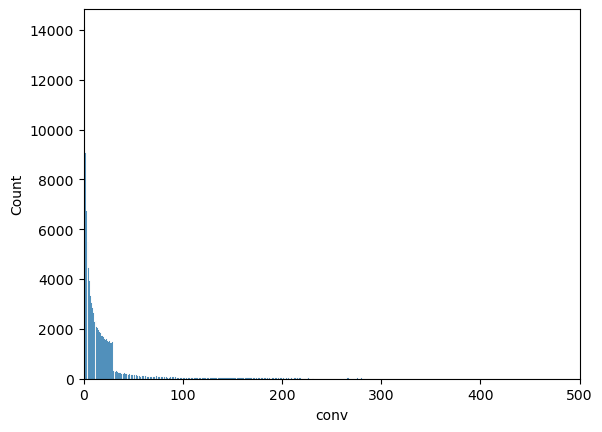

In [ ]:
# uids count hist
uids_count = df.groupby("uid").count()["conv"]

sns.histplot(uids_count).set(xlim=(0, 500))

<Axes: xlabel='revenue', ylabel='Count'>

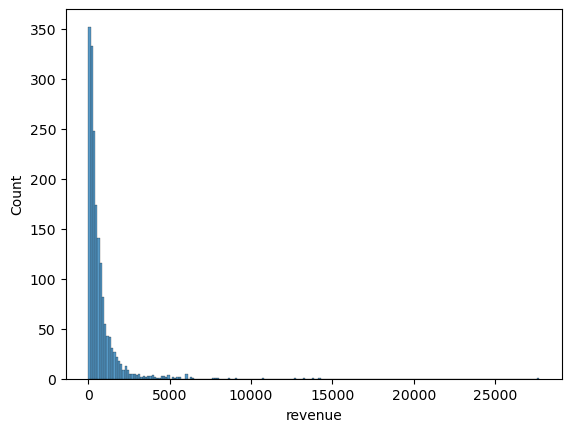

In [ ]:
# revenue distribution
sns.histplot(df[df.revenue != 0].revenue, bins=200)

In [5]:
display(
    main.find_means(old), 
    main.find_means(new)
)

conv                  0.000838
revenue               0.540472
revenue_nonzeros    644.964955
dtype: float64

conv                  0.000886
revenue               0.773963
revenue_nonzeros    873.276653
dtype: float64

In [7]:
display(
    main.find_percentiles(old, percentile=75),
    main.find_percentiles(new, percentile=75)
)

conv                  0.000000
revenue               0.000000
revenue_nonzeros    772.753772
dtype: float64

conv                  0.000000
revenue               0.000000
revenue_nonzeros    935.756445
dtype: float64

In [9]:
main.t_test(old, new)

,statistic,p_value
conv,-1.193165,0.232805
revenue,-3.789929,0.000151
revenue_nonzeros,-3.70009,0.000222


In [10]:
main.permutation_test(old, new, num_permutations=500)

conv done
revenue done
revenue_nonzeros done


,statistic,p_value
conv,-0.000048,0.255489
revenue,-0.233491,0.003992
revenue_nonzeros,-228.311697,0.003992


In [11]:
main.permutation_test(old, new, num_permutations=1000)

conv done
revenue done
revenue_nonzeros done


,statistic,p_value
conv,-0.000048,0.227772
revenue,-0.233491,0.001998
revenue_nonzeros,-228.311697,0.001998
